# NLP 2025
# Lab 3: Attention and Pre-trained Models

Our practical journey in NLP has so far covered the following:

🧪 Lab 1: Tokenize and pre-process text in different ways.

🧠 Lab 2: Train different representation models (e.g. TF-IDF) and/or use pre-trained word embeddings with useful applications (such as information retrieval).

🚀 We will now escalate from using pre-trained static word embeddings to use pre-trained models (like BERT). The model is pre-trained on vast amounts of data 📚 and that allows for better generalization. As we discussed in class, BERT models are based on transformers 🤖, which use attention to model sequences (in our case sequences of words).

💡 BERT provides for contextualized embeddings, aka the embedding vector of a word is only determined once the actual context of that word is known. 👉 Practically, this allows for words to have different embedding vectors depending on their actual context (e.g. think of the word "bank" 🏦🏞️ and its multiple meanings in different contexts).

In this lab, we will learn how to load and use pre-trained models (e.g. BERT) from Huggingface 🤗.

By the end of this lab you should be able to:

- 🧠📦Load and/or use pre-trained models and tokenizers to solve different NLP tasks
- 🔍🧬 Inspect and analyze the inner workings (hidden layers etc.) of attention models (like BERT)
- 🧲📝 Use attention models to get sentence representations (aka sentence embeddings)
- 📚🎯 Use BERT sentence embeddings to solve more complicated tasks like information retrieval
- ⚖️📊 Compare performance of different models and assess their effectiveness
- 🛠️🐍 Load and use the basics of pytorch and huggingface transformers (important frameworks in NLP)

### Score breakdown

| Exercise            | Points |
|---------------------|--------|
| [Exercise 1](#e1)   | 1      |
| [Exercise 2](#e2)   | 3      |
| [Exercise 3](#e3)   | 5      |
| [Exercise 4](#e4)   | 2      |
| [Exercise 5](#e5)   | 10     |
| [Exercise 6](#e6)   | 5      |
| [Exercise 7](#e7)   | 10     |
| [Exercise 8](#e8)   | 2      |
| [Exercise 9](#e9)   | 1      |
| [Exercise 10](#e10) | 3      |
| [Exercise 11](#e11) | 10     |
| [Exercise 12](#e12) | 3      |
| [Exercise 13](#e13) | 10     |
| [Exercise 14](#e14) | 10     |
| [Exercise 15](#e15) | 15     |
| [Exercise 16](#e16) | 10     |
| Total               | 100    |

This score will be scaled down to 1 and that will be your final lab score.

### 📌 **Instructions for Delivery** (📅 **Deadline: 2/May 18:00**, 🎭 *wildcards possible*)

✅ **Submission Requirements**
+ 📄 You need to submit a **PDF of your report** (use the templates provided in **LaTeX** 🖋️ (*preferred*) or **Word** 📑) and a **copy of your notebook** 📓 with the code.
+ ⚡ Make sure that **all cells are executed properly** ⚙️ and that **all figures/results/plots** 📊 you include in the report are also visible in your **executed notebook**.

✅ **Collaboration & Integrity**
+ 🗣️ While you may **discuss** the lab with others, you must **write your solutions with your group only**. If you **discuss specific tasks** with others, please **include their names** in the appendix of the report.
+ 📜 **Honor Code applies** to this lab. For more details, check **Syllabus §7.2** ⚖️.
+ 📢 **Mandatory Disclosure**:
   - Any **websites** 🌐 (e.g., **Stack Overflow** 💡) or **other resources** used must be **listed and disclosed**.
   - Any **GenAI tools** 🤖 (e.g., **ChatGPT**) used must be **explicitly mentioned**.
   - 🚨 **Failure to disclose these resources is a violation of academic integrity**. See **Syllabus §7.3** for details.

## 0. Setup (Huggingface + PyTorch  = ❤️)

You should know the drill by now. As in the last lab, we will be using huggingface datasets library ([https://huggingface.co/datasets](https://huggingface.co/datasets)). You can find the detailed documentation and tutorials here: [https://huggingface.co/docs/datasets/en/index](https://huggingface.co/docs/datasets/en/index)

If you don't have it installed you can run the code below (if in Google Colab) or copy the code to the terminal (if you run locally):

In [2]:
# ! pip install -U datasets

Next, we will need [PyTorch](https://pytorch.org/) installed. It is a very popular deep learning library that offers modularized versions of many of the sequence models we discussed in class. It's an important tool that you may want to practice further if you want to dive deeper into NLP, since much of the current academic and industrial research uses it.

Some resources to look further are given below.

* [Documentation](https://pytorch.org/docs/stable/index.html) (We will need this soon)

* [Installation Instructions](https://pytorch.org/get-started/locally/)

* [Quickstart Tutorial](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html)

The cell below should install the library:

In [3]:
# ! pip install torch torchvision torchaudio

The last bit we need is the huggingface transformers library (here is the documentation [https://huggingface.co/docs/transformers/en/index](https://huggingface.co/docs/transformers/en/index)). Transformers are one of the most influential architectures in handling sequences (not only in language). As we discussed in lectures, they excel at taking into account context (which is the salt-and-pepper of NLP) with mechansisms such as self-attetion, which allows them to weigh the importance of different words in a sentence. If you want to know more, revisit the course material (slides and textbook).

We already used huggingface datasets in previous labs and huggingface transformers integrates nicely with that. Apart from the ease of use, huggingface is also providing pre-trained models of different kinds. The list can be found [here](https://huggingface.co/models) ([https://huggingface.co/models](https://huggingface.co/models)). The following line should be enough to install huggingface transformers library:

In [4]:
! pip install transformers

As usual, we start by importing some essential Python libraries that we will be using.

In [5]:
import math

import numpy as np
import matplotlib.pyplot as plt
import datasets
import transformers
import tqdm
import torch

## 1. Load and Preprocess Data

For easiness and comparison purposes, we will ue the same dataset as in the previous lab. That will help us re-visit the approach and see whether contextualized architectures can do better in the same problem/task/dataset.

As a reminder:

*Sentence compression* involves rephrasing sentences to make them shorter while still retaining the original meaning. A reliable compression system would be valuable for mobile devices and could also serve as a component in an extractive summarization system.

The dataset we are going to use can be found on [Huggingface](https://huggingface.co/datasets/embedding-data/sentence-compression). It concerns a set of 180,000 pairs of sentences, aka it is a parallel corpus of sentences and their equivalent compressions. It has been collected by harvesting news articles from the Internet where the headline appears to be similar to the first sentence and that property is used to find an "extractive" compression of the sentence.

For example, for the sentence

`"Regulators Friday shut down a small Florida bank, bringing to 119 the number of US bank failures this year amid mounting loan defaults"`

the compressed equivalent (based on the dataset) is:

`"Regulators shut down small Florida bank"`.


For more information you can read the original paper (from Google) [here](https://aclanthology.org/D13-1155.pdf).

### 1.1 Loading the Dataset

The dataset will be loaded as a huggingface datgaset. This may take a few minutes because of the large size of the data.

Make sure to inspect the dataset and make sure it is imported properly.

In [6]:
ds = datasets.load_dataset('embedding-data/sentence-compression')
print(ds)

DatasetDict({
    train: Dataset({
        features: ['set'],
        num_rows: 180000
    })
})


In [7]:
for i in range(10):
    print(ds['train'][i])

{'set': ["The USHL completed an expansion draft on Monday as 10 players who were on the rosters of USHL teams during the 2009-10 season were selected by the League's two newest entries, the Muskegon Lumberjacks and Dubuque Fighting Saints.", 'USHL completes expansion draft']}
{'set': ['Major League Baseball Commissioner Bud Selig will be speaking at St. Norbert College next month.', 'Bud Selig to speak at St. Norbert College']}
{'set': ["It's fresh cherry time in Michigan and the best time to enjoy this delicious and nutritious fruit.", "It's cherry time"]}
{'set': ['An Evesham man is facing charges in Pennsylvania after he allegedly dragged his girlfriend from the side of his pickup truck on the campus of Kutztown University in the early morning hours of Dec. 5, police said.', 'Evesham man faces charges for Pa.']}
{'set': ["NRT LLC, one of the nation's largest residential real estate brokerage companies, announced several executive appointments within its Coldwell Banker Residential B

The dataset comes with a `train` split so we will have to split that into `train`/`test` ourselves with the line below.

In [8]:
split_ds = ds['train'].train_test_split(test_size=0.2)
print(split_ds)

DatasetDict({
    train: Dataset({
        features: ['set'],
        num_rows: 144000
    })
    test: Dataset({
        features: ['set'],
        num_rows: 36000
    })
})


Note that previously, we had very much full control over the vocabulary of the dataset (in terms of pre-processing including tokenization). That is because we wanted to build our own embedding model.

By using a *pre-trained* model (like we are going to do at this lab), we need to adhere to the way this model was trained (including the tokenization). Huggingface provides the models, along with the relevant tokenizers, therefore cleaning is not necessary (as in previous labs). You can still include it if you think this would improve the results of the retrieval in the later parts of the lab.

<a name='e1'></a>
### Exercise 1 Unpacking the set
(1p) Instead of cleaning, we will unpack the `set` (containing tuples of full and compressed sentences) column into separate `sentence` and `compressed` columns. This will make it a bit easier for us later.

One key difference in this function is the fact that it will accept a batch of examples (instead of a single example in the exercises in the previous lab). You can iterate through the examples this way:

```
for set in examples['set']
```

The new columns should be lists containing strings (full or compressed sentences) extracted from the `set` column.

Fill in the function below to complete this task

In [9]:
def unpack(examples):
    """
    Unpacks the column `set` into two columns `sentence` and `compressed`.
    Args:
        examples: a batch of examples from the dataset

    Returns: modified examples with two new columns: `sentence` and `compressed`

    """
    sentences = []
    compressed_sentences = []

    ### YOUR CODE HERE
    for set in examples['set']:
        # add the full sentence to the sentences column
        sentences.append(set[0]) 
        # add the compressed sentence to the compressed_sentences column
        compressed_sentences.append(set[1])
    ### YOUR CODE ENDS HERE

    examples['sentence'] = sentences
    examples['compressed'] = compressed_sentences
    return examples

In the next cell, we will apply the `unpack` function to the whole dataset. Notice that we also drop the original `set` column.

In [10]:
split_ds = split_ds.map(unpack, batched=True, remove_columns=['set'])
print(split_ds)

Map:   0%|          | 0/144000 [00:00<?, ? examples/s]

Map:   0%|          | 0/36000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['sentence', 'compressed'],
        num_rows: 144000
    })
    test: Dataset({
        features: ['sentence', 'compressed'],
        num_rows: 36000
    })
})


Let's examine some examples from the dataset and make sure that we got the results we wanted.

In [11]:
for i in range(10):
    print(split_ds['train'][i])

{'sentence': "And yes, that's just what has happened, the NY Post has posted the Erin Andrews photos.", 'compressed': 'The NY Post posts the Erin Andrews photos'}
{'sentence': 'YUCAIPA, Calif. A new brushfire has broken out in the foothills near Yucaipa in San Bernardino County as temperatures in inland Southern California soared.', 'compressed': 'Brushfire breaks out in foothills of Yucaipa'}
{'sentence': "Steven Meisel shot Alessandra Ambrosio and Ashton Kutcher for Brazilian label Colcci's new ad campaign.", 'compressed': 'Steven Meisel shoots Alessandra Ambrosio and Ashton Kutcher;'}
{'sentence': 'Wrigley Field, home of the Chicago Cubs, was damaged yesterday by heavy snowstorms ripping through the heart of the country, as several tiles from the top of the press box were torn off; streets in the area are shut down for the cleanup.', 'compressed': 'Wrigley Field damaged in heavy snowstorms'}
{'sentence': 'Alastair Cook will lead England in both forms of the game throughout the forth

In this lab, we will be using only pre-trained models. That means that we won't be training any new model. This is the reason we can select only the `test` subset for the rest of the notebook (this is where we will be assessing the performance of the pre-trained models). At the same time, we will save much time, as we will not be processing the `train` subset.

In [12]:
test_ds = split_ds['test']
print(test_ds)

Dataset({
    features: ['sentence', 'compressed'],
    num_rows: 36000
})


### 1.2 Loading the Tokenizer

For the first part of this lab, we will be using a pre-trained BERT model from Huggingface, namely the [BERT Uncased](https://huggingface.co/google-bert/bert-base-uncased). You can read the original paper that introduced this model [here](https://aclanthology.org/N19-1423.pdf). This paper has been once of the most cited papers ever (currently having more than 100,000 citations).

We will specify the model name that can be found on the model's card on huggingface (revisit the first link). Make sure to check what other information Huggingface is offering (e.g. how to use the model, limitations, how to inference, etc.).

In [13]:
model_name = 'google-bert/bert-base-uncased'

The models on huggingface come with their own tokenizers. They are loaded separately from the models. We can use [AutoTokenizer](https://huggingface.co/docs/transformers/v4.40.2/en/model_doc/auto#transformers.AutoTokenizer)'s `from_pretrained()` method to load it.

Inspect the output: The loaded object is of `BertTokenizerFast` class. Check the documentation [here](https://huggingface.co/docs/transformers/model_doc/bert#transformers.BertTokenizerFast).

In [14]:
tokenizer = transformers.AutoTokenizer.from_pretrained(model_name)
print(tokenizer)

c:\Users\Tobias\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


PreTrainedTokenizerFast(name_or_path='google-bert/bert-base-uncased', vocab_size=30522, model_max_len=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})


Next, let's see how we can use it to tokenize some text.

In [15]:
print(test_ds[0]['sentence'])
tokenized = tokenizer(test_ds[0]['sentence'], padding=True, return_tensors='pt')
print("---")
print(type(tokenized))
print("---")
print(tokenized)

BILLIE Piper gets all tied up at a sex party in tomorrow's episode of Secret Diary of a Call Girl.
---
<class 'transformers.tokenization_utils_base.BatchEncoding'>
---
{'input_ids': tensor([[  101, 18210, 11939,  4152,  2035,  5079,  2039,  2012,  1037,  3348,
          2283,  1999,  4826,  1005,  1055,  2792,  1997,  3595,  9708,  1997,
          1037,  2655,  2611,  1012,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1]])}


Examine the outputs: The tokenizer returned three things:
- `input_ids` - this is a PyTorch tensor ([https://pytorch.org/docs/stable/tensors.html](https://pytorch.org/docs/stable/tensors.html)) with the indices of our tokens. PyTorch tensors are similar to numpy arrays. They hold data in a multidimensional array or matrix. The difference is that PyTorch tensors can be placed and modified on the GPU which greatly improves the speed of execution.
- `token_type_ids` - this tensor holds the information about the index of the sentence. This has to do with the classification objective from the original paper, where two sentences were given and the model had to predict if they are connected. Because we only included a single sentence, we have only zeros here. We will not be concerned with it in this lab.
- `attention_mask` - holds the mask that the model will use to determine if the tokens in the `input_ids` are the real tokens or *padding*. Padding is a technique used to ensure that all input sequences have the same length. BERT (like many other NLP models) process data in batches and requires each sequence in a batch to have the same length, so sequences that are shorter than the maximum sequence length in the batch are padded with special tokens. In this case, because we only inputted a single sentence, the mask contains only ones. Later you will see examples where this is not the case.

Let's see how exactly the sentence was tokenized and how we can retrieve the original text. Notice that some words have been split into multiple tokens (remember when we discussed sub-word tokenization in class?). Also pay attention to the added special tokens, namely `CLS` and `SEP`:

The `[CLS]` token is a special classification token added at the beginning of every input sequence. It stands for "classification" (daah!) and is used by BERT to aggregate information from the entire sequence. The final hidden state corresponding to this token (after passing through the transformer layers) is used as the aggregate sequence representation for classification tasks. We will use this later in the lab!

The `[SEP]` token is used to separate different segments or sentences within the input sequence. It stands for "separator" (daaah again!).

In [16]:
print(tokenized['input_ids'].shape)
print("---")
print(tokenizer.convert_ids_to_tokens(tokenized['input_ids'][0]))
print("---")
print(len(tokenizer.convert_ids_to_tokens(tokenized['input_ids'][0])))
print("---")
print(tokenizer.decode(tokenized['input_ids'][0]))
print("---")
print(tokenizer.decode(tokenized['input_ids'][0], skip_special_tokens=True))

torch.Size([1, 25])
---
['[CLS]', 'billie', 'piper', 'gets', 'all', 'tied', 'up', 'at', 'a', 'sex', 'party', 'in', 'tomorrow', "'", 's', 'episode', 'of', 'secret', 'diary', 'of', 'a', 'call', 'girl', '.', '[SEP]']
---
25
---
[CLS] billie piper gets all tied up at a sex party in tomorrow's episode of secret diary of a call girl. [SEP]
---
billie piper gets all tied up at a sex party in tomorrow's episode of secret diary of a call girl.


Tokenizer can process a list of sentences. This will create a batched output with tensor's first dimension corresponding to the batch size (the number of sentences we passed to the tokenizer). Examine the following cell and make sure it makes sense to you.

In [17]:
print(test_ds[0:3]['sentence'])
tokenized = tokenizer(test_ds[0:3]['sentence'], padding=True, return_tensors='pt')
print(tokenized)
print(tokenized['input_ids'].shape)
print(tokenizer.convert_ids_to_tokens(tokenized['input_ids'][0]))
print(len(tokenizer.convert_ids_to_tokens(tokenized['input_ids'][0])))
print(tokenizer.decode(tokenized['input_ids'][0]))
print(tokenizer.decode(tokenized['input_ids'][0], skip_special_tokens=True))

["BILLIE Piper gets all tied up at a sex party in tomorrow's episode of Secret Diary of a Call Girl.", 'President Bush will speak at the Air Force Academy graduation ceremony May 28.', "-Lindsay Lohan wanted to ``feel free'' again during Thanksgiving Day."]
{'input_ids': tensor([[  101, 18210, 11939,  4152,  2035,  5079,  2039,  2012,  1037,  3348,
          2283,  1999,  4826,  1005,  1055,  2792,  1997,  3595,  9708,  1997,
          1037,  2655,  2611,  1012,   102],
        [  101,  2343,  5747,  2097,  3713,  2012,  1996,  2250,  2486,  2914,
          7665,  5103,  2089,  2654,  1012,   102,     0,     0,     0,     0,
             0,     0,     0,     0,     0],
        [  101,  1011, 12110,  8840,  4819,  2359,  2000,  1036,  1036,  2514,
          2489,  1005,  1005,  2153,  2076, 15060,  2154,  1012,   102,     0,
             0,     0,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0],
     

<a name='e2'></a>
### Exercise 2 Questions about the tokenizer

Answer the following questions:
- (1p) What is the size of the vocabulary?
- (2p) What are the special tokens apart from `[CLS]` and `[SEP]`? What are their functions?

In [18]:
print("Vocabulary size:", tokenizer.vocab_size)

Vocabulary size: 30522


### 1.4 Loading the Model

In this section, we will load and examine the model. We will start with selecting the device we will place the model on. This will be a GPU (if one is available) or a CPU.

Google Colab offers free access to GPU, provided there is availability (also baed on quotas which may vary based on your usage and the overall demand on Colab's resources). If you are working locally, then if you don't have a GPU, CPU will be selected. For the first parts of the assignment running on CPU might be okay but when we have to load the dataset a GPU will be necessary.

The following cell will select the device for us.

In [19]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(f'Device: {device}')

Device: cpu


Now, let's load the model from huggingface and place it (slowly because it's heavy due to the large number of parameters) on the device from the previous cell (the methods `to()`).

In [20]:
model = transformers.AutoModel.from_pretrained(model_name)
model.to(device)
print(model)

Some weights of the model checkpoint at google-bert/bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

<a name='e3'></a>
### Exercise 3 Questions about the Model

Examine the output of the previous cells. Answer the following questions:
- (1p) What is the number of transformer layers in this model?
- (1p) What is the dimension of the embeddings?
- (1p) What is the hidden size of the FFN in the transformer layer?
- (1p) What is the total number of parameters of the model (hint: check the `num_parameters()` method of the model)?
- (1p) How can you find the vocabulary size from the model?

In [21]:
print("Total number of parameters:", model.num_parameters())

Total number of parameters: 109482240


Next, let's use BERT model for inference. We will tokenize the first sentence of our dataset and pass it to the model. We set `output_hidden_states` to `True` in order to have access to the hidden states of the model. Those represent the latent representations after embedding and transformer layers.

In [22]:
tokenized = tokenizer(test_ds[0]['sentence'], padding=True, return_tensors='pt').to(device)
print(tokenized)
model_output = model(**tokenized, output_hidden_states=True)

{'input_ids': tensor([[  101, 18210, 11939,  4152,  2035,  5079,  2039,  2012,  1037,  3348,
          2283,  1999,  4826,  1005,  1055,  2792,  1997,  3595,  9708,  1997,
          1037,  2655,  2611,  1012,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1]])}


Examine the next cell and make sure everything makes sense to you. Consult the [documentation](https://huggingface.co/docs/transformers/model_doc/bert#transformers.BertModel.forward) in case of doubt.

In [23]:
print(list(model_output.keys()))
print(type(model_output['pooler_output']))
print(model_output['pooler_output'].shape)
print(type(model_output['hidden_states']))
print(len(model_output['hidden_states']))
print(type(model_output['hidden_states'][0]))
print(model_output['hidden_states'][0].shape)

['last_hidden_state', 'pooler_output', 'hidden_states']
<class 'torch.Tensor'>
torch.Size([1, 768])
<class 'tuple'>
13
<class 'torch.Tensor'>
torch.Size([1, 25, 768])


## 2. Exploring BERT hidden states

In this section we will look in more detail into the embeddings (latent representations) of BERT model. As a reminder, BERT embeddings a type of contextual word embeddings generated by the BERT model. They capture the meaning of words in the actual context. Notice the contrast with the static word embeddings we worked with in the previous lab: Then, we only needed a large corpus to compute word embeddings. In the case of BERT, we need to pass the actual sequence through the model to get the equivalent vector. More specifically, we tokenize the sentence (based on the relevant model and tokenizer), add the special tokanes (`CLS` and `SEP`, which are added authomatically by the tokenizer) and pass the sentence in the model.

<a name='e4'></a>
### Exercise 4 Plotting the layer-wise similarities between words 

(2p) We will use the following function to plot the cosine similarity between tokens in different sentences. It takes `hidden_states` and `tokens_of_interest_ids` arguments. The `hidden_states` is a list of Tensors and contains the hidden states of the sentences. The size of the list is equal to the number of layers in the model (+1 for the initial embedding) and each element is a Tensor with the first dimension corresponding to the sentences in the batch and second to the tokens (see the previous code cell). The third dimension is the size of the embedding. The `tokens_of_interest_ids` is a list of integers of the size equal to the number of sentences. The integers are indices that identify tokens we want to compare with each other.

Fill in the function by first extracting the embeddings of the token-of-interest in a `layer` for two sentences `sent1` and `sent2`. Next, calculate the cosine similarity between the embeddings. You can use an existing PyTorch implementation of cosine similarity.

In [24]:
from typing import List
from itertools import combinations
import torch
import torch.nn.functional as F

def plot_evolving_similarities(hidden_states: List[torch.Tensor], tokens_of_interest_ids: List[int]):
    """
    Plots the evolving cosine similarity between the hidden representation of tokens in different sentences.
    Hidden states are provided as a list of tensors where each tensor corresponds to the layer of the model.
    Each tensor contains the hidden representations of each token (second dimension) of each sentence (first dimension).
    For each sentence, there has to be a token of interest (can be the same).
    
    Args:
        hidden_states: a list of tensors containing the hidden representations of sentences
        tokens_of_interest_ids: a list of indices of tokens of interest
    """
    assert hidden_states[0].shape[0] == len(tokens_of_interest_ids), \
        'The batch size of hidden_states must be equal to the number of tokens of interest'
    
    num_layers = len(hidden_states)
    num_sentences = len(tokens_of_interest_ids)

    sentence_combinations = list(combinations(range(num_sentences), 2))
    similarities = [[] for _ in range(len(sentence_combinations))]

    for layer in range(num_layers):
        for i, (sent1, sent2) in enumerate(sentence_combinations):
        ### YOUR CODE HERE
            # 1. Extract embeddings for the tokens of interest in the current layer for sent1 and sent2
            emb1 = hidden_states[layer][sent1, tokens_of_interest_ids[sent1]]
            emb2 = hidden_states[layer][sent2, tokens_of_interest_ids[sent2]]
            # 2. Compute the cosine similarity between the two embeddings
            cosine_similarity = F.cosine_similarity(emb1, emb2, dim=0).item()
            similarities[i].append(cosine_similarity)
        ### YOUR CODE ENDS HERE

    for i, (sent1, sent2) in enumerate(sentence_combinations):
        plt.plot(range(num_layers), similarities[i],
                 label=f'between {sent1 + 1} and {sent2 + 1}')
    
    plt.xlabel('Layer')
    plt.ylabel('Cosine Similarity')
    plt.title('Evolving Token Similarities Across Layers')
    plt.legend()
    plt.show()


Here are three sentences with the word "bank". The word form is the same for all, however the meaning is different in the second sentence. Remember polysemy?

We can plot how the cosine similarity between the embeddings (and latent representations) of the word "bank" in each sentence evolves through the different layers of BERT.

The following code follows the procedure we described above.

{'input_ids': tensor([[  101,  2057,  2097,  6487,  1037,  2924,  2279,  2733,   999,   102,
             0,     0,     0],
        [  101,  1996,  2336, 16791,  6386,  2011,  1996,  2924,  1997,  1996,
          2314,  1012,   102],
        [  101,  1045,  2404,  2769,  1999,  1996,  2924,  1012,   102,     0,
             0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]])}
['[CLS]', 'we', 'will', 'rob', 'a', 'bank', 'next', 'week', '!', '[SEP]', '[PAD]', '[PAD]', '[PAD]']
['[CLS]', 'the', 'children', 'skipped', 'stones', 'by', 'the', 'bank', 'of', 'the', 'river', '.', '[SEP]']
['[CLS]', 'i', 'put', 'money', 'in', 'the', 'bank', '.', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
bank
bank


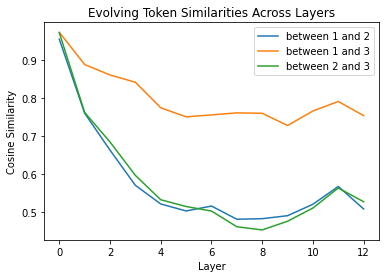

In [25]:
text1 = "We will rob a bank next week!"
text2 = "The children skipped stones by the bank of the river."
text3 = "I put money in the bank."
tokenized = tokenizer([text1, text2, text3], padding=True, return_tensors='pt').to(device)
print(tokenized)

tokens1 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][0])
tokens2 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][1])
tokens3 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][2])
print(tokens1)
print(tokens2)
print(tokens3)

tokens_ids_of_interest = [5, 7, 6]
print(tokens1[tokens_ids_of_interest[0]])
print(tokens2[tokens_ids_of_interest[1]])
print(tokens3[tokens_ids_of_interest[2]])

model_outputs = model(**tokenized, output_hidden_states=True)
plot_evolving_similarities(model_outputs['hidden_states'], tokens_ids_of_interest)

<a name='e5'></a>
### Exercise 5 Evolution of embeddings

- (3p) Discuss the plots above. Are the plots showing what you expected to see?
- (1p) Take a look at the similarity between the word "bank" in the first example for the first layer (layer index 0)? This corresponds to the embedding layer of BERT. It is close to `1` but not exactly. Why is that?
- (3p) Plot and analyze the similarities between words "nice", "bad", and "lovely" in the sentences "The weather is nice today.", "The weather is bad today.", and "The weather is lovely today.". Comment on the results. Are the plots showing what you expected to see? 
- (3p) Try a different set of sentences and comment on the results.

{'input_ids': tensor([[ 101, 1996, 4633, 2003, 3835, 2651, 1012,  102],
        [ 101, 1996, 4633, 2003, 2919, 2651, 1012,  102],
        [ 101, 1996, 4633, 2003, 8403, 2651, 1012,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1]])}
['[CLS]', 'the', 'weather', 'is', 'nice', 'today', '.', '[SEP]']
['[CLS]', 'the', 'weather', 'is', 'bad', 'today', '.', '[SEP]']
['[CLS]', 'the', 'weather', 'is', 'lovely', 'today', '.', '[SEP]']
is
is
is


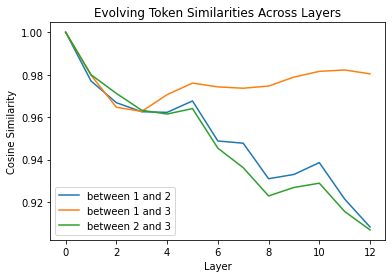

In [26]:
### YOUR CODE HERE
text1 = "The weather is nice today."
text2 = "The weather is bad today."
text3 = "The weather is lovely today."
tokenized = tokenizer([text1, text2, text3], padding=True, return_tensors='pt').to(device)
print(tokenized)

tokens1 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][0])
tokens2 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][1])
tokens3 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][2])
print(tokens1)
print(tokens2)
print(tokens3)

tokens_ids_of_interest = [3, 3, 3]
print(tokens1[tokens_ids_of_interest[0]])
print(tokens2[tokens_ids_of_interest[1]])
print(tokens3[tokens_ids_of_interest[2]])

model_outputs = model(**tokenized, output_hidden_states=True)
plot_evolving_similarities(model_outputs['hidden_states'], tokens_ids_of_interest)

### YOUR CODE ENDS HERE
### NOTICE: you can always add more cells if you need them

{'input_ids': tensor([[ 101, 2016, 2357, 2006, 1996, 2422, 1012,  102,    0,    0],
        [ 101, 1996, 3482, 2001, 2200, 2422, 1012,  102,    0,    0],
        [ 101, 2027, 4993, 1996, 2282, 1037, 2422, 2630, 1012,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}
['[CLS]', 'she', 'turned', 'on', 'the', 'light', '.', '[SEP]', '[PAD]', '[PAD]']
['[CLS]', 'the', 'box', 'was', 'very', 'light', '.', '[SEP]', '[PAD]', '[PAD]']
['[CLS]', 'they', 'painted', 'the', 'room', 'a', 'light', 'blue', '.', '[SEP]']
light
light
light


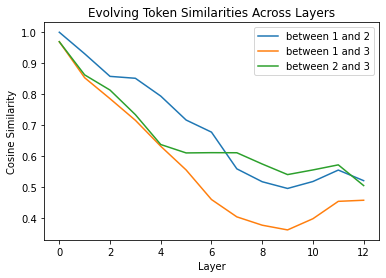

In [39]:
text1 = "She turned on the light."
text2 = "The box was very light."
text3 = "They painted the room a light blue."
tokenized = tokenizer([text1, text2, text3], padding=True, return_tensors='pt').to(device)
print(tokenized)

tokens1 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][0])
tokens2 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][1])
tokens3 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][2])
print(tokens1)
print(tokens2)
print(tokens3)

tokens_ids_of_interest = [5, 5, 6]
print(tokens1[tokens_ids_of_interest[0]])
print(tokens2[tokens_ids_of_interest[1]])
print(tokens3[tokens_ids_of_interest[2]])

model_outputs = model(**tokenized, output_hidden_states=True)
plot_evolving_similarities(model_outputs['hidden_states'], tokens_ids_of_interest)

## 3. Calculating BERT sentence embeddings

It is finally time to use BERT's hidden states as word embeddings. First, you will write a function to aggregate the BERT's hidden representations of the words in a sentence.

<a name='e6'></a>
### Exercise 6 Implement sentence embeddings

(5p) Implement the following function. It will receive the batched input to the model and its output. Calculate the mean embedding of the tokens in each sentence. In particular, get `attention_mask` from the `input_batch` and `hidden_states` from `model_output` (already done for you), and calculate the mean of the hidden states. Remember that you are working with a batch, so both `attention_mask` and `hidden_states` contain multiple sentences (the first dimension of both tensors correspond to the size of the batch). In the end, you should have a tensor with a shape batch_size x embedding_size.

Pay attention to the padded tokens (indicated by the attention mask from the input).

Additionally, the function will receive the `layer` parameter. It will indicate the index of the layer of which the hidden representations of tokens will be aggregated. The default value of `-1` indicates the last layer. The code already selects the hidden states of the specified layer.

Optionally, you can ignore the special tokens `[CLS]` and `[SEP]`.

In [27]:
def calculate_sentence_embeddings(input_batch, model_output, layer=-1):
    """
    Calculates the sentence embeddings of a batch of sentences as a mean of token representations.
    The representations are taken from the layer of the index provided as a `layer` parameter.
    Args:
        input_batch: tokenized batch of sentences (as returned by the tokenizer), contains `input_ids`, `token_type_ids`, and `attention_mask` tensors
        model_output: the output of the model given the `input_batch`, contains `last_hidden_state`, `pooler_output`, `hidden_states` tensors
        layer: specifies the layer of the hidden states that are used to calculate sentence embedding

    Returns: tensor of the averaged hidden states (from the specified layer) for each example in the batch

    """
    attention_mask = input_batch['attention_mask']
    hidden_states = model_output['hidden_states'][layer]

    ### YOUR CODE HERE
    # Convert attention_mask to float and expand dimensions to match hidden_states
    attention_mask = attention_mask.unsqueeze(-1).float()  

    # Multiply hidden states by the attention mask to zero-out padding token embeddings
    masked_hidden_states = hidden_states * attention_mask  

    # Sum the token embeddings along the sequence length
    sum_hidden = masked_hidden_states.sum(dim=1)           

    # Count the number of real tokens in each sentence
    lengths = attention_mask.sum(dim=1)                    

    # Avoid division by zero
    lengths = lengths.clamp(min=1e-9)

    # Compute the mean by dividing summed embeddings by valid token counts
    sentence_embeddings = sum_hidden / lengths            

    ### YOUR CODE ENDS HERE


    return sentence_embeddings

Let us try out the function.

In [28]:
text = "The weather is nice today."
tokenized = tokenizer(text, padding=True, return_tensors='pt').to(device)
print(tokenized)
model_output = model(**tokenized, output_hidden_states=True)
print(model_output['last_hidden_state'].shape)
sentence_embedding = calculate_sentence_embeddings(tokenized, model_output)
print(sentence_embedding.shape)

{'input_ids': tensor([[ 101, 1996, 4633, 2003, 3835, 2651, 1012,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}
torch.Size([1, 8, 768])
torch.Size([1, 768])


The following function will plot the evolution of cosine similarities between sentence embeddings based on representations of different layers of the model.

Notice that it will receive a function that is used to calculate the sentence embeddings (that is the function we implemented above).

In [29]:
def plot_evolving_sentence_similarities(input_batch, model_outputs, sentence_embeddings_fn):
    num_layers = len(model_outputs['hidden_states'])
    num_sentences = input_batch['input_ids'].shape[0]
    sentence_combinations = tuple(combinations(range(num_sentences), 2))
    similarities = [[] for _ in range(len(sentence_combinations))]

    for layer in range(num_layers):
        sentence_embeddings = sentence_embeddings_fn(input_batch, model_outputs, layer)
        for i, (sent1, sent2) in enumerate(sentence_combinations):
            embedding1 = sentence_embeddings[sent1]
            embedding2 = sentence_embeddings[sent2]
            cosine_similarity = torch.nn.functional.cosine_similarity(embedding1, embedding2, dim=0)
            similarities[i].append(cosine_similarity.detach().cpu().numpy())

    for i, (sent1, sent2) in enumerate(sentence_combinations):
        plt.plot(range(num_layers), similarities[i], label=f'between {sent1 + 1} and {sent2 + 1}')

    plt.xlabel('layer')
    plt.ylabel('cosine similarity')
    plt.legend()
    plt.show()


Let's examine the cosine similarities of the sentences with the word "bank" from earlier.

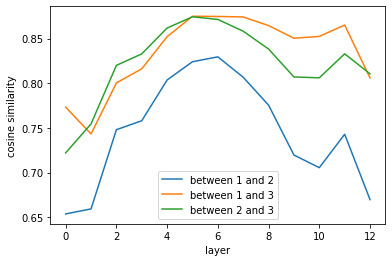

In [30]:
text1 = "We will rob a bank next week!"
text2 = "Let's put our savings into a bank account."
text3 = "We will steal some money from the bank."

tokenized = tokenizer([text1, text2, text3], padding=True, return_tensors='pt').to(device)

model_outputs = model(**tokenized, output_hidden_states=True)
plot_evolving_sentence_similarities(tokenized, model_outputs, calculate_sentence_embeddings)

<a name='e7'></a>
### Exercise 7 Try different sentences

(10p) Try out your sentence embeddings on at least two different sets of sentences. Inspect the results in terms of the different layers. Comment on the results. Are they expected?

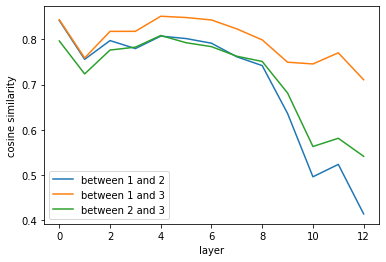

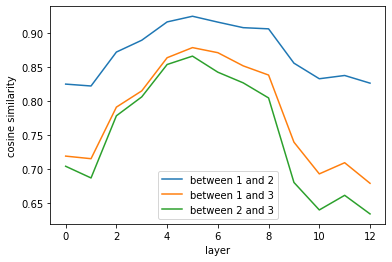

In [31]:
### YOUR CODE HERE

# Sentences with high lexical overlap but different meanings 
text1 = "The ball was caught by the player on the field."
text2 = "The ball was held in a grand ballroom."
text3 = "The ball rolled down the hill and into the street."

tokenized = tokenizer([text1, text2, text3], padding=True, return_tensors='pt').to(device)

model_outputs = model(**tokenized, output_hidden_states=True)

plot_evolving_sentence_similarities(tokenized, model_outputs, calculate_sentence_embeddings)

# Sentences with high contextual overlap but different words
text1 = "A man is driving a car through the city."
text2 = "Someone is piloting a vehicle in an urban area."
text3 = "He navigates traffic downtown in his sedan."

tokenized = tokenizer([text1, text2, text3], padding=True, return_tensors='pt').to(device)

model_outputs = model(**tokenized, output_hidden_states=True)

plot_evolving_sentence_similarities(tokenized, model_outputs, calculate_sentence_embeddings)


### YOUR CODE ENDS HERE

### 3.1 Applying BERT sentence embeddings

Next, we will be calculating the word embeddings on our dataset. This is the moment where having GPU will greatly speed up the computations but fast CPU should do just fine (you might have to wait couple of minutes for embedding the whole dataset).

As mentioned before, we can use Google Colab [https://colab.google/](https://colab.google/) for this purpose. It gives you access to a GPU for a limited time (after you used this time you will have to wait for some time to use it again). To use a GPU you need to select the runtime type. Go to "Runtime -> Change runtime type". There you can select a CPU or a GPU.

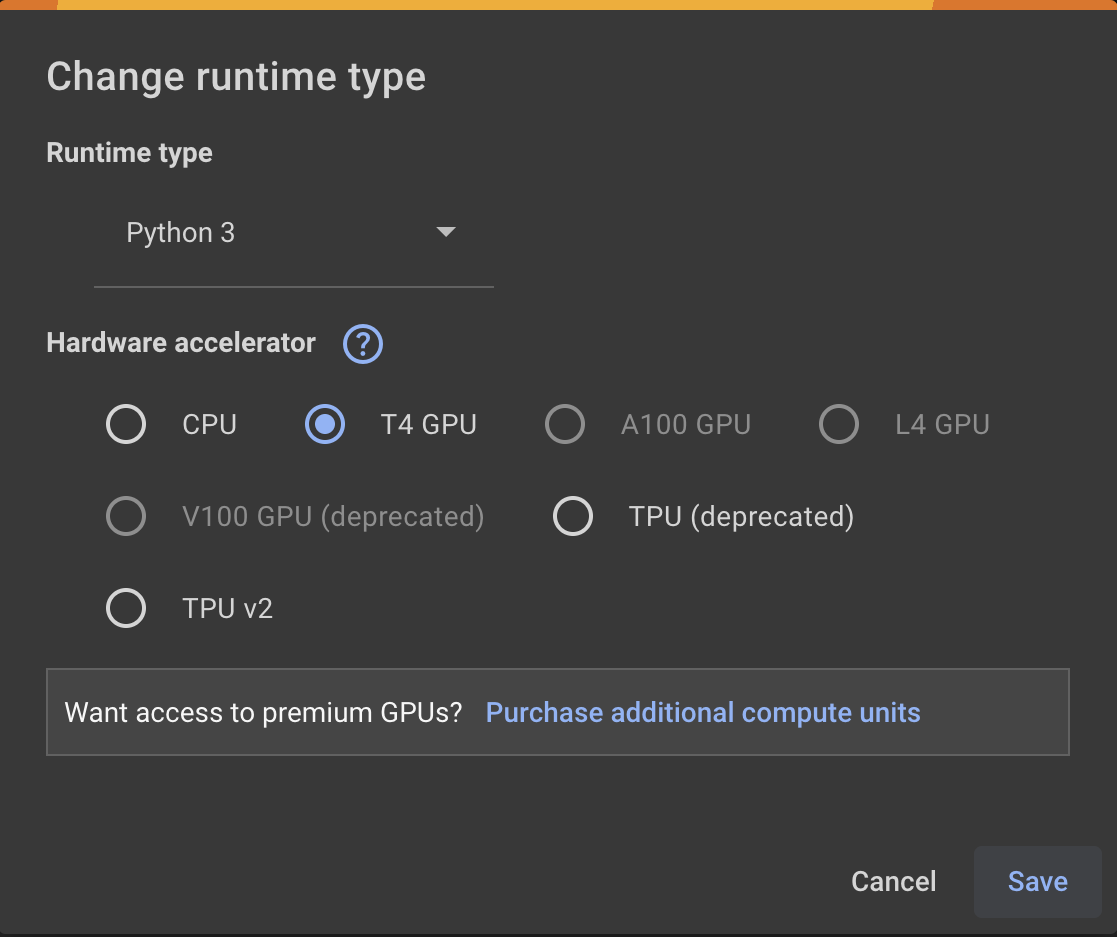

It might be a good idea to first work on a CPU with a slice of the dataset until your code works without problems. Then you can switch to a GPU runtime and work on the whole dataset. Notice that you will have to run all the cells again as the change of the runtime will effectively start a fresh session.

⚠️ **Disclaimer**: Google Colab provides free access to GPUs, but this comes with limitations. Sessions are time-limited (typically ~12 hours), resources are shared (you might not always get access to a GPU) and idle notebooks can be disconnected. If you're using Colab Pro or Pro+, the limits are more relaxed but still not unlimited. Be mindful of these constraints when planning long-running experiments or training large models. Since you're working in a group, you should be able to access up to 3 accounts — keep this in mind as you plan your work.

If you have a GPU locally, you don't need to do that, and you can work on the whole dataset from the get go.

To select a portion of the dataset uncomment the following cell. Make sure to comment it again when you are ready to run the notebook on the notebook on the GPU.

In [32]:
test_ds = test_ds.select(range(5000))

<a name='e8'></a>
### Exercise 8 Tokenize sentence and compressed
(2p) We will first tokenize the dataset. Write two functions that will tokenize the two columns - `sentence` and `compressed` - separately. Do not use padding when tokenizing, as we will later use [DataCollator](https://huggingface.co/docs/transformers/en/main_classes/data_collator) to "pack and pad" the examples to form batches.

If you have any doubts please check the following [tutorial](https://huggingface.co/docs/datasets/use_dataset) on Huggingface.

In [33]:
def tokenize_sentence(examples):
    """
    Tokenizes the `sentence` column from the batch of examples and returns the whole output of the tokenizer.
    Args:
        examples: a batch of examples

    Returns: the tokenized `sentence` column (returns the whole output of the tokenizer)

    """
    ### YOUR CODE HERE

    tokenized_sentence = tokenizer(
        examples["sentence"],
        truncation=True,            # for stability
        return_attention_mask=True,
        return_tensors=None         # ensure dataset format
    )

    ### YOUR CODE ENDS HERE
    return tokenized_sentence


def tokenize_compressed(examples):
    """
    Tokenizes the `compressed` column from the batch of examples and returns the whole output of the tokenizer.
    Args:
        examples: a batch of examples

    Returns: the tokenized `compressed` column (returns the whole output of the tokenizer)

    """

    ### YOUR CODE HERE

    tokenized_compressed = tokenizer(
        examples["compressed"],
        truncation=True,
        return_attention_mask=True,
        return_tensors=None
    )
    ### YOUR CODE ENDS HERE
    return tokenized_compressed

In the next cell, we will apply the functions that you implemented on the dataset (using `map()` method). We will do it twice to obtain two separate datasets for full and compressed sentence each. Notice that we drop the original columns when we form the new datasets.

In [34]:
tokenized_sentence_ds = test_ds.map(tokenize_sentence, batched=True, remove_columns=['sentence', 'compressed'])
print(tokenized_sentence_ds)

tokenized_compressed_ds = test_ds.map(tokenize_compressed, batched=True, remove_columns=['sentence', 'compressed'])
print(tokenized_sentence_ds)

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Dataset({
    features: ['input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 5000
})


Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Dataset({
    features: ['input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 5000
})


Let's examine the first few examples from both datasets. Make sure that they make sense to you.

In [35]:
print(tokenized_sentence_ds[0:3])
print(tokenized_compressed_ds[0:3])

{'input_ids': [[101, 18210, 11939, 4152, 2035, 5079, 2039, 2012, 1037, 3348, 2283, 1999, 4826, 1005, 1055, 2792, 1997, 3595, 9708, 1997, 1037, 2655, 2611, 1012, 102], [101, 2343, 5747, 2097, 3713, 2012, 1996, 2250, 2486, 2914, 7665, 5103, 2089, 2654, 1012, 102], [101, 1011, 12110, 8840, 4819, 2359, 2000, 1036, 1036, 2514, 2489, 1005, 1005, 2153, 2076, 15060, 2154, 1012, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}
{'input_ids': [[101, 18210, 4152, 2035, 5079, 2039, 2012, 2283, 102], [101, 5747, 2000, 3713, 2012, 2250, 2486, 2914, 7665, 102], [101, 12110, 8840, 4819, 4122, 2000, 1005, 2514, 2489, 1005, 2153, 102]], 'tok

In the following cell you can find the function that will apply the provided sentence embedding function to the dataset. It uses the DataCollator we metioned earlier (you are welcome to check the documentation: [https://huggingface.co/docs/transformers/en/main_classes/data_collator](https://huggingface.co/docs/transformers/en/main_classes/data_collator)).

In [36]:
from torch.utils.data.dataloader import DataLoader

def embed_dataset(dataset, model, sentence_embedding_fn, batch_size=8):
    data_collator = transformers.DataCollatorWithPadding(tokenizer)
    data_loader = DataLoader(dataset, batch_size=batch_size, collate_fn=data_collator)
    sentence_embeddings = []
    with torch.no_grad():
        for batch in tqdm.tqdm(data_loader):
            batch.to(device)
            model_output = model(**batch, output_hidden_states=True)
            batch_sentence_embeddings = sentence_embedding_fn(batch, model_output)
            sentence_embeddings.append(batch_sentence_embeddings.detach().cpu())

    sentence_embeddings = torch.concat(sentence_embeddings, dim=0)
    return sentence_embeddings

We will embed the dataset containing sentences by using the function from the previous cell. We will pass your `calculate_sentence_embeddings` function. By default, this function uses the hidden representations of the last layer.

If you are not using a GPU this can take some time depending on your system and your implementation.

To use different layer you can pass different value for the `layer` parameter using python's `functools.partial` function ([https://docs.python.org/3/library/functools.html#functools.partial](https://docs.python.org/3/library/functools.html#functools.partial)).

In [37]:
sentence_embeddings = embed_dataset(tokenized_sentence_ds, model, calculate_sentence_embeddings)
print(sentence_embeddings.shape)

 37%|███▋      | 230/625 [03:52<06:38,  1.01s/it]


KeyboardInterrupt: 

The following cell will embed the compressed sentences. Make sure to pass the same function for calculating the sentence embeddings.

In [ ]:
compressed_embeddings = embed_dataset(tokenized_compressed_ds, model, calculate_sentence_embeddings)
print(compressed_embeddings.shape)

100%|█████████████████████████████████████████| 625/625 [02:34<00:00,  4.04it/s]

torch.Size([5000, 768])


## 4. Retrieving Sentences

Guess what? We are going to try the same task/dataset as the previous lab and hopefully get better performance.

As a reminder, we will be using vector representations (based on the BERT embeddings) to retrieve only the relevant ones based on some user query. It is similar to the a search retrieval task (based on what we discussed in the relevant lecture) where a user provides a query (that is the compressed sentence) and the system returns the sentences that are more similar to the query.

In the information retrieval lecture, we discussed how to solve this retrieval problem by using bag-of-words as a representation basis. In Lab 2, we solved the problem using static word embeddings (learned from our corpus) and by averaring their equivalent vectors per sentence. Now, we are going to use the BERT model (we loaded above) to get contextualized sentence embeddings! Are you as excited as we are?

<a name='e9'></a>
### Exercise 9 Embed query function

(1p) First step to a retrieval task is to embed the query (aka find a proper vector representation). We will do it the same way as we did it in the previous exercises. Complete the following function to return the embedding of the provided text.

In [ ]:
def embed_query(query, sentence_embedding_fn):
    """
    Embeds the provided query using the model and the `sentence_embedding_fn` function
    Args:
        query: a str with the query
        sentence_embedding_fn: the function used to embed the sentence based on the input and output of the model

    Returns: a PyTorch tensor with the embedded query

    """

    #### YOUR CODE HERE
    
    query_tokenized = tokenizer(query, return_tensors="pt", truncation=True).to(model.device)
    model_output = model(**query_tokenized, output_hidden_states=True)
    
    ### YOUR CODE ENDS HERE

    query_embedding = sentence_embedding_fn(query_tokenized, model_output)

    return query_embedding.detach().cpu()


Next we will embed the query (which is the same as in the previous lab). What is the dimensionality of the embedding?

In [ ]:
query = "volcano erupted"
print(query)

query_embedding = embed_query(query, calculate_sentence_embeddings)
print(query_embedding.shape)
print(query_embedding)

volcano erupted
torch.Size([1, 768])
tensor([[-2.4407e-01, -4.3162e-02, -2.3228e-01, -2.9772e-01, -2.6477e-02,
         -4.3528e-01,  7.6832e-01,  6.7760e-01, -2.0858e-02,  2.0260e-01,
         -3.2669e-01, -2.4911e-01, -1.2773e-01,  4.2605e-01, -4.0244e-01,
         -2.6756e-01,  2.0195e-01, -1.1365e-01,  5.4491e-02,  4.8539e-01,
          2.5284e-01, -4.1042e-01, -2.0181e-01,  8.5660e-02,  2.8552e-01,
         -1.3665e-01, -7.1692e-01,  4.7204e-01, -2.2398e-01,  6.3613e-02,
         -4.6483e-02,  3.3382e-01, -4.0432e-02,  1.8827e-01, -2.3810e-02,
         -3.0328e-01,  1.2326e-01,  1.1149e-01, -8.2531e-01,  9.0165e-02,
         -4.6962e-01, -2.4502e-01,  3.4935e-01,  3.8621e-01,  1.1002e-01,
          9.0557e-02,  9.7116e-02,  3.1298e-01, -4.5225e-01,  5.4962e-02,
         -4.5311e-02,  2.9595e-01, -2.7043e-01, -1.0531e-01, -1.8903e-01,
          7.9161e-01,  2.8868e-01, -2.5304e-01,  3.0694e-01, -2.1287e-01,
         -6.1727e-02,  1.7793e-01, -1.6932e-01, -5.9215e-01, -1.3097e-01,
 

<a name='e10'></a>
### Exercise 10 Cosine similarity 1 to n in PyTorch

(3p) The next step in our retrieval system, would be to calculate the proximity of a query to our retrieval corpus (in our case that is all the sentences).

Complete the following function to calculate the cosine similarity between a vector (first parameter `vector`, that will usually be the query vector) and all other vectors (second parameter `other_vectors`, that will be the sentence embeddings in our case).

The corresponding function from the previous lab would actually work without changes, as PyTorch's tensors are automatically cast into numpy arrays. That said, convert the function into PyTorch to see how the two libraries are similar to each other.

Note that the `other_vectors` parameter is a single PyTorch tensor of size `N x D`, where $N$ is the number of vectors and $D$ is the dimension of each vector.

In [ ]:
def cosine_similarity_1_to_n(vector, other_vectors):
    """
    Calculates the cosine similarity between a single vector and other vectors.
    Args:
        vector: a tensor representing a vector of D dimensions
        other_vectors: a 2D tensor representing other vectors (of the size NxD, where N is the number of vectors and D is their dimension)

    Returns: a 1D numpy array of size N containing the cosine similarity between the vector and all the other vectors

    """

    #### YOUR CODE HERE

     # Normalize both vector and other_vectors along their last dimension
    vector_norm = F.normalize(vector, dim=0)        
    other_vectors_norm = F.normalize(other_vectors, dim=1) 

    # Compute cosine similarity as dot product
    similarity = torch.matmul(other_vectors_norm, vector_norm) 

    return similarity

    ### YOUR CODE ENDS HERE

We will use the function to calculate the similarity of all sentences in the dataset to our query.

In [ ]:
query_similarity = cosine_similarity_1_to_n(query_embedding[0], sentence_embeddings)
print(query_similarity.shape)
print(query_similarity[:10])

torch.Size([5000])
tensor([0.4401, 0.3955, 0.4199, 0.4663, 0.4398, 0.3350, 0.5256, 0.3978, 0.3413,
        0.3820])


The following cell will select the most similar sentence.

In [ ]:
most_similar = int(np.argmax(query_similarity))
print(most_similar)
print(query_similarity[most_similar])
print(test_ds[most_similar]['sentence'])

4700
tensor(0.6068)
A suspected arson fire leaves a family homeless.


The following function will return the indices of the top-k elements in the array.

In [ ]:
def top_k_indices(array, k, sorted=True):
    """
    Returns top-k indices from the 1D array. If `sorted` is `True` the returned indices are sorted in the descending order
    Args:
        array: a 1D numpy array
        k: a number of top indices to return
        sorted: if True, the returned indices are sorted in descending order

    Returns: a 1D array containing top-k indices

    """
    top_k = np.argpartition(array, -k)[-k:]
    if sorted:
        selected = array[top_k]
        sorted_selected = (-selected).argsort()
        top_k = top_k[sorted_selected]
    return top_k

In [ ]:
top_indices = top_k_indices(query_similarity, k=10).tolist()
for idx in top_indices:
    print(split_ds['test'][idx]['sentence'])
    print(f'similarity: {query_similarity[idx]}')

A suspected arson fire leaves a family homeless.
similarity: 0.6068292260169983
Bridge closure concerns Grimsby merchants.
similarity: 0.5801450610160828
A New Hampshire man died after a skiing accident at Alta Saturday.
similarity: 0.5799204707145691
A flood watch continues for our area.
similarity: 0.5781028270721436
An Olathe bank is closed after suffering a failure.
similarity: 0.574626624584198
An overnight crash in Orange County sends a driver to the hospital.
similarity: 0.5620224475860596
An electrical problem is getting the blame for a house fire in Big Spring on Sunday.
similarity: 0.5614244341850281
A child and one other person are dead after two separate collisions Tuesday in Southern Alberta.
similarity: 0.5612851977348328
Vancouver firefighters have contained a house fire that broke out this morning near the Columbia River.
similarity: 0.5535277724266052
A climber has died from his injuries after falling more than 300ft from a Lake District mountain.
similarity: 0.5522738

<a name='e11'></a>
### Exercise 11 Experiment with different queries

(10p) Experiment with different queries (taking into account the nature of the dataset and your insights from the analysis so far).
Try at least 5 different queries and analyze top 5 most similar responses. 

Does the search perform well? When does it fail? Provide reasons for the good/bad result in each case. 

Optionally, if you completed the previous lab, try the examples from that case. What do you observe?

In [ ]:
#### YOUR CODE HERE



### YOUR CODE ENDS HERE

## 5. Evaluating Retrieval

In this section (as with the previous lab) we will try to evaluate how good our sentence retrieval system is. To keep the computational resources manageable, we will use the test set for that as its size is more manageable.

Recall from the lecture in IR that there are several metrics to evaluate retrieval performance by taking into account the relevance of the retrieved results to the query. We will use Recall@K here (for more metrics and more details refer to the lecture slides and the textbooks).

RRecall@K is a metric used to measure the effectiveness of a search system in retrieving relevant documents within the top $K$ retrieved documents. It calculates the proportion of relevant documents retrieved within the top-$K$ results, compared to the total number of relevant documents in the collection.

$
\text{Recall@K} = \frac{\text{Number of relevant documents retrieved in the top }-K}{\text{Total number of relevant documents}}
$

In our case, we have a sentence, and it's compressed version. To test our system, we will treat compressed sentences as the queries. Each query will have only a single relevant sentence - the corresponding uncompressed sentence.

Therefore, for the calculation of Recall@K we will take into account whether the correct retrieved result is contained within the first $K$ retrieved results. For example, if for a query (i.e. a compressed sentence) we retrieve 10 results and within these we see the relevant one (i.e. the full sentence), then Recall@10 = 1.

<a name='e12'></a>
### Exercise 12 Cosine similarity m to n in PyTorch

(3p) In this exercise you will revisit your implementation of the cosine siliarity. Generalize it so that it can accept two PyTorch tensors containing two sets of vectors (first one containing $M$ vectors and the second one $N$ vectors). Compute the cosine similarity between each pair of vectors coming from the two sets. The result should be a tensor of size $M x N$.

Once again, try to write an efficient code. This means no loops. Remember the relation between matrix multiplication and dot product. (Depending on your implementation of the previous function calculating cosine similarity, this one can be almost the same)

In [ ]:
def cosine_similarity_m_to_n(vectors, other_vectors):
    """
    Calculates the cosine similarity between a multiple vectors and other vectors.
    Args:
        vectors: a numpy array representing M number of vectors of D dimensions (of the size MxD)
        other_vectors: a 2D numpy array representing other vectors (of the size NxD, where N is the number of vectors and D is their dimension)

    Returns: a numpy array of cosine similarity between all the vectors and all the other vectors

    """

    #### YOUR CODE HERE




    # return similarity

    ### YOUR CODE ENDS HERE

The following function will use your implementation to calculate Recall@K based on the similarity matrix.

In [ ]:
def calculate_recall(queries, sentences, k, batch_size=1000):
    """
    Calculates recall@k given the embeddings of the queries and sentences.
    Assumes that only a single sentence with the same index as query is relevant.
    Batching is implemented to avoid high memory usage.
    Args:
        queries: a numpy array with the embeddings of N queries
        sentences: a numpy array with the embeddings of N sentences available for retrieval
        k: number of top results to search for the relevant sentence
        batch_size: number of queries to process at a time

    Returns: calculated recall@k

    """
    n_queries = queries.shape[0]
    correct = np.zeros(n_queries, dtype=bool)

    with tqdm.tqdm(total=n_queries) as pbar:
        for batch_start in range(0, n_queries, batch_size):
            batch_end = min(batch_start + batch_size, n_queries)
            queries_batch = queries[batch_start:batch_end]
            batch_similarity = cosine_similarity_m_to_n(queries_batch, sentences)

            for i, similarity_row in enumerate(batch_similarity):
                query_index = batch_start + i
                top_k = top_k_indices(similarity_row, k=k, sorted=False)

                if query_index in top_k:
                    correct[query_index] = True

                pbar.update(1)

    recall = np.sum(correct) / n_queries
    return recall

You can use it like so:

In [ ]:
recall_at_1 = calculate_recall(compressed_embeddings, sentence_embeddings, k=1, batch_size=1000)
print(f'\n{recall_at_1 * 100:.2f}%')

<a name='e13'></a>
### Exercise 13 Recal for different k-s

Calculate recall for different values of $K$ (at least 5 different values). Comment on how recall changes based on the value of $K$. Are the results expected or surprising? At this stage, do not experiment further. That will come in the next Sections which are more open ended.

In [ ]:
#### YOUR CODE HERE



### YOUR CODE ENDS HERE

## 6. Pushing the performance: Modifying the sentence embeddings


<a name='e14'></a>
### Exercise 14 Different ways of embedding sentences

(10p) Experiment with the way the sentence embedding is calculated and check performance on the task. For example, you can try using the embedding of the `CLS` token or averaging the hidden states of different layer or even averaging the representations of several layers. The choice is yours, but make sure to give a justification of your choice, based on the results and your inspection of the dataset. 

Inspect the representations of tokens and sentences.

Evaluate the modification on the sentence retrieval task.

In [ ]:
#### YOUR CODE HERE




### YOUR CODE ENDS HERE

## Pushing the performance: Trying different models



<a name='e15'></a>
### Exercise 15 Different model

(15p) In this exercise you are asked to try other BERT-like model from huggingface. You can consider the MSMARCO model [here](https://huggingface.co/sentence-transformers/msmarco-bert-base-dot-v5). Make sure to read the model card on the huggingface website in order to understand how to use it. You don't need to install `sentence-transformers`.

As before, inspect the the representations of tokens and sentences. 

Evaluate the model on sentence retrieval.

In [ ]:
#### YOUR CODE HERE




### YOUR CODE ENDS HERE

### Exercise 16 Comparison between models

(10p) Compare the models you used in this lab (and optionally the previous lab if you completed it). Discuss the results and the potential benefits and drawbacks of each method.

In [ ]:
#### YOUR CODE HERE




### YOUR CODE ENDS HERE